In [5]:
# RESULTS_ZIP_FILE = "../../results/synthBootstrap/synthBootstrap_mini.zip"
# RESULTS_FOLDER_DESTINATION = "../../results/synthBootstrap"

In [6]:
# import zipfile

# with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
#     zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [7]:
RESULTS_FOLDER = "text/"

In [8]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

200

In [9]:
%run ../../utils/postprocessing.py --folder ../../results/synthBootstrap/synthBootstrap_mini --suffix .txt

100%|██████████| 200/200 [00:01<00:00, 191.14it/s]


In [7]:
#%run ../../utils/extract_screenshots --folder ../../results/synthBootstrap/synthBootstrap_mini --webGenerator

In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/synthBootstrap/synthBootstrap_mini 

In [10]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [11]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [12]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.000000
mean,5631.860000,5738.19000,6030.090000,0.878267,774.120000,0.134180,0.902813,11.010000,0.126270,0.741060
std,2166.451845,2039.43047,2249.971628,0.132226,963.413819,0.133172,0.086493,12.847588,0.147231,0.091470
min,0.000000,2184.00000,2210.000000,0.480363,41.000000,0.013755,0.578894,0.000000,0.000000,0.398618
25%,3956.750000,4183.50000,4227.500000,0.856922,142.250000,0.042624,0.877876,2.000000,0.031769,0.687968
50%,5358.000000,5381.00000,5884.000000,0.936039,332.500000,0.080733,0.938718,5.000000,0.068969,0.752611
75%,7119.250000,7201.25000,7871.500000,0.964996,933.000000,0.172501,0.959881,18.000000,0.195161,0.792266
max,10873.000000,10782.00000,10873.000000,0.985925,4033.000000,0.530472,0.985557,68.000000,0.971429,0.999850


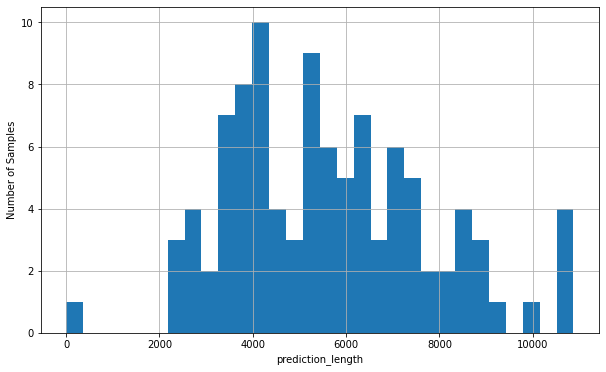

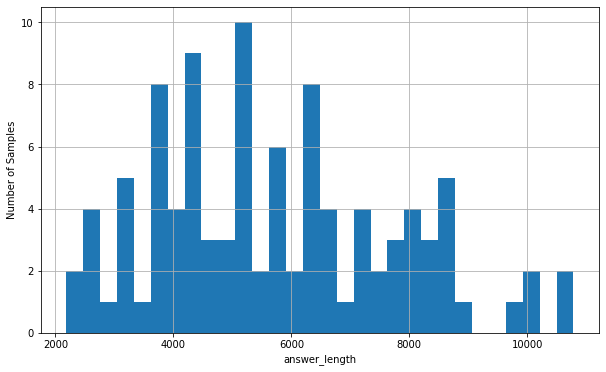

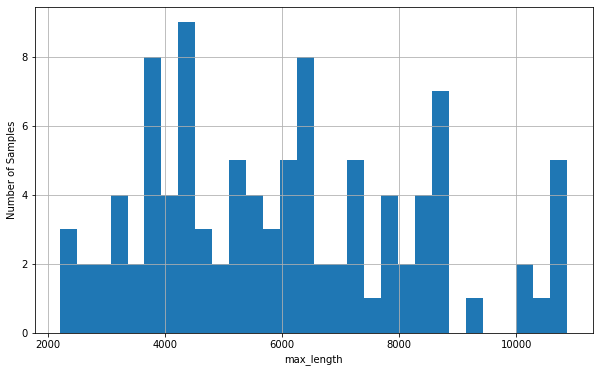

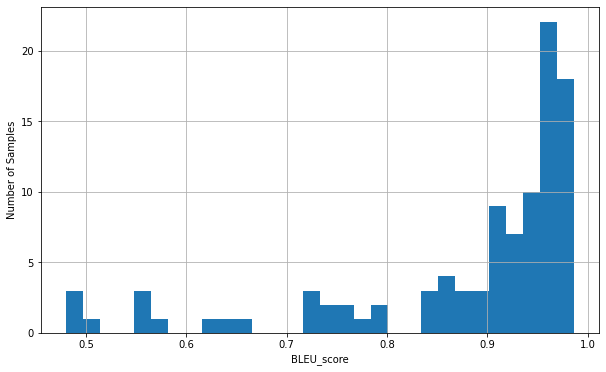

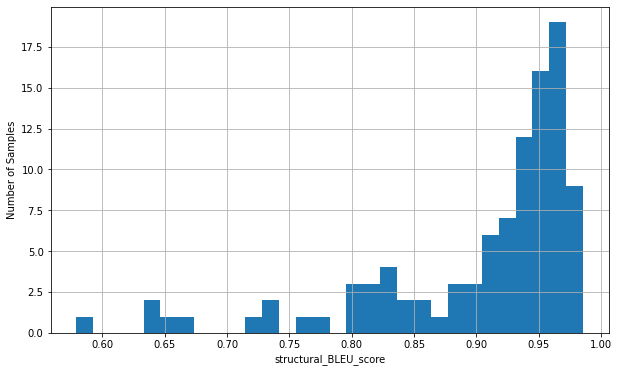

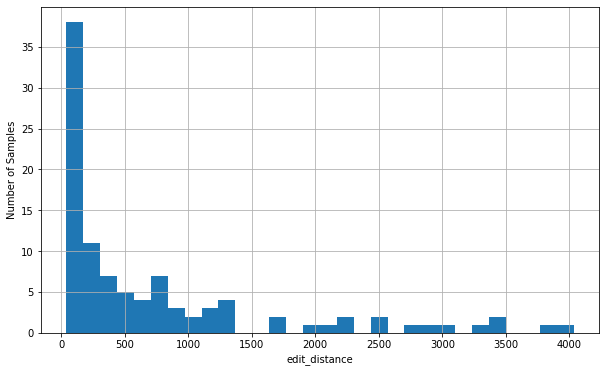

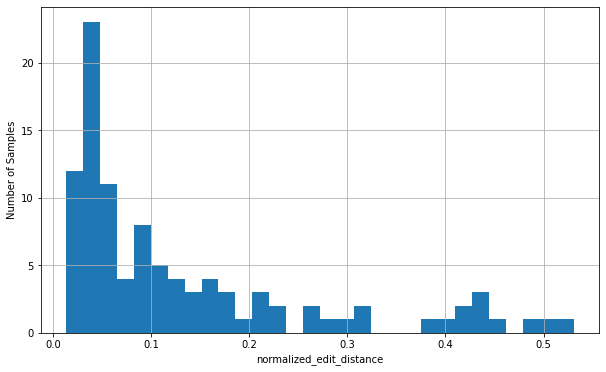

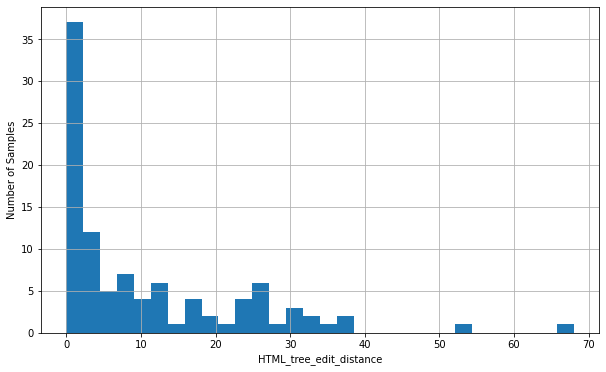

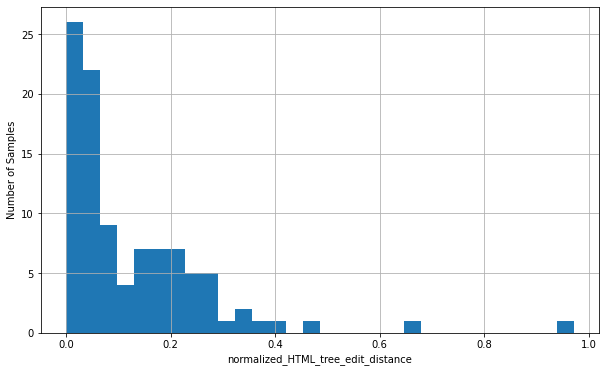

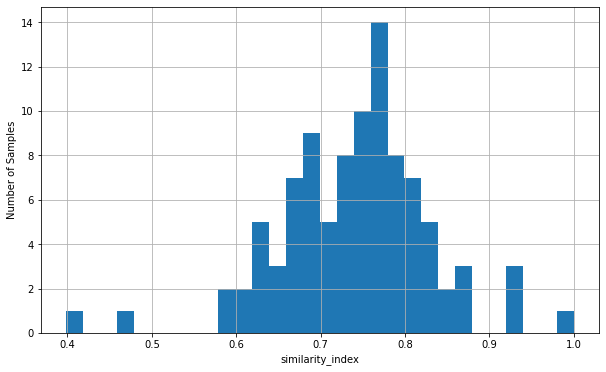

In [13]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


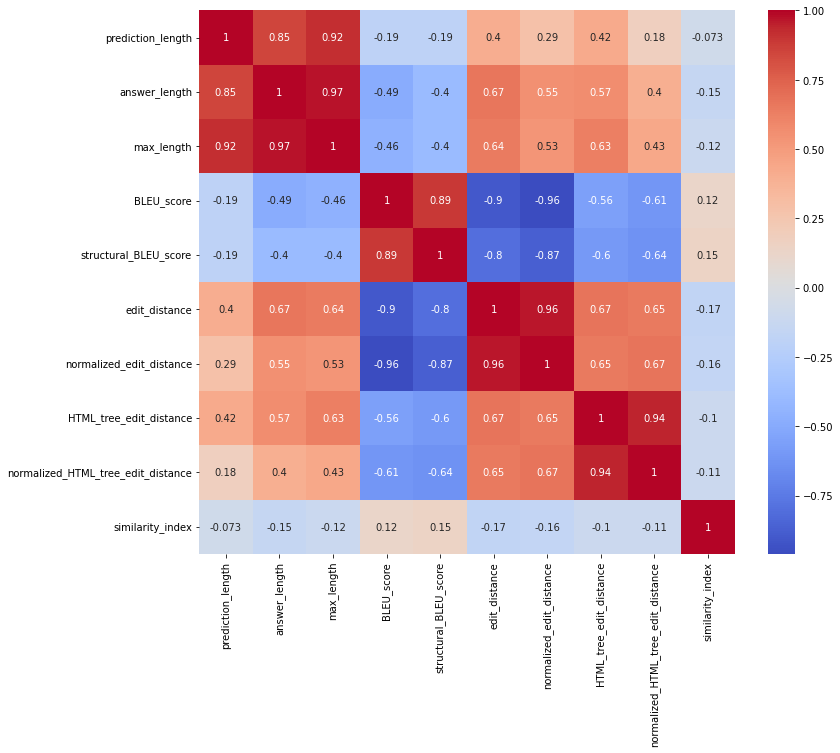

In [14]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

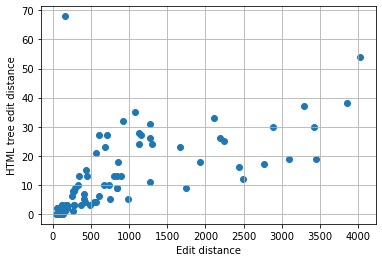

In [15]:
plt.scatter(df["edit_distance"], df["HTML_tree_edit_distance"])
#plt.title("Edit distance vs HTML tree edit distance")
plt.xlabel("Edit distance")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


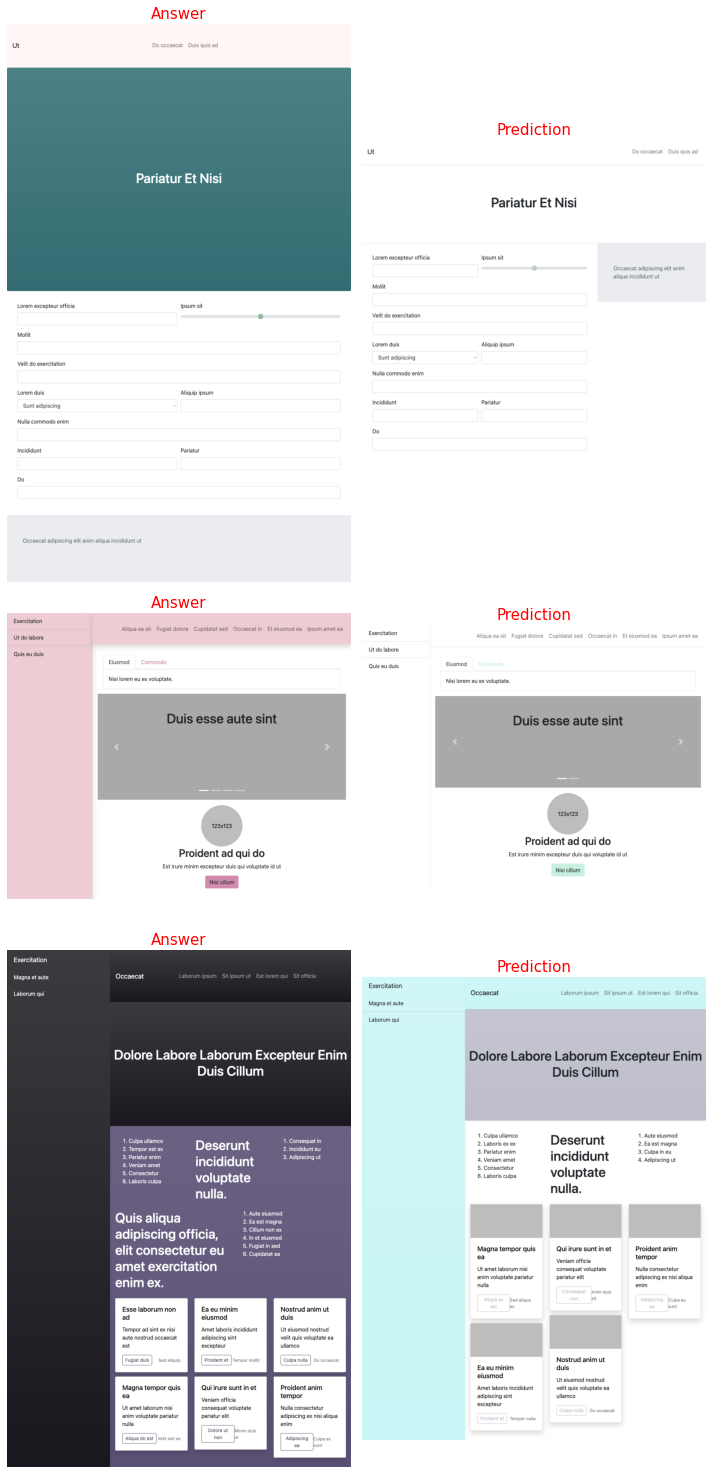

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 3

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*7))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
